In [1]:
# 특징 선택

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from matplotlib import rc
import matplotlib as mpl
import warnings
warnings.filterwarnings(action="ignore")
rc('font', family="AppleGothic")
%matplotlib inline

from sklearn.datasets import fetch_rcv1
rcv_train = fetch_rcv1(subset="train")
rcv_test = fetch_rcv1(subset="test")
X_train = rcv_train.data
y_train = rcv_train.target
X_test = rcv_test.data
y_test = rcv_test.target

# One-Hot-Encoding된 라벨을 정수형으로 복원
classes = np.arange(rcv_train.target.shape[1])
y_train = y_train.dot(classes)
y_test = y_test.dot(classes)

print(X_train.shape)
print(X_test.shape)
%time

(23149, 47236)
(781265, 47236)
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [2]:
### 분산에 의한 선택
### : target과 상관관계가 높은 feature를 선택하기 전에 
###   feature값 자체의 분산이 작을 경우(변동이 적은 값일 경우) 
###   모델에 도움이 되지 않을 가능성이 높음. 
###   target과의 상관관계를 고려하지 않기 때문에 사용에 주의할 필요가 있음. 
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(1e-5)
X_train_sel = selector.fit_transform(X_train)
X_test_sel = selector.transform(X_test)
print(X_train_sel.shape)
print(X_test_sel.shape)

(23149, 14330)
(781265, 14330)


In [3]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [4]:
model = BernoulliNB()
model.fit(X_train, y_train)
print("train accuracy:{:5.3f}".format(accuracy_score(y_train, model.predict(X_train))))
print("test accuracy :{:5.3f}".format(accuracy_score(y_test, model.predict(X_test))))
%time

train accuracy:0.381
test accuracy :0.324
CPU times: user 16 µs, sys: 6 µs, total: 22 µs
Wall time: 42 µs


In [5]:
model_sel = BernoulliNB()
model_sel.fit(X_train_sel, y_train)
print("train accuracy:{:5.3f}".format(accuracy_score(y_train, model_sel.predict(X_train_sel))))
print("test accuracy :{:5.3f}".format(accuracy_score(y_test, model_sel.predict(X_test_sel))))
%time

train accuracy:0.529
test accuracy :0.441
CPU times: user 26 µs, sys: 13 µs, total: 39 µs
Wall time: 58.2 µs


In [6]:
### 단일 변수 선택
### : 가장 분류성능 혹은 상관관계가 높은 변수만 선택하는 방법
###   단일 변수의 성능이 높은 특징만 모은다고 전체 성능이 반드시 향상된다는 보장은 없음. 
from sklearn.feature_selection import chi2, SelectKBest

In [7]:
selector1 = SelectKBest(chi2, k=X_train_sel.shape[1])
X_train1 = selector1.fit_transform(X_train, y_train)
X_test1 = selector1.transform(X_test)

model = BernoulliNB()
model.fit(X_train1, y_train)
print("train accuracy:{:5.3f}".format(accuracy_score(y_train, model.predict(X_train1))))
print("test accuracy :{:5.3f}".format(accuracy_score(y_test, model.predict(X_test1))))
%time

train accuracy:0.505
test accuracy :0.438
CPU times: user 21 µs, sys: 7 µs, total: 28 µs
Wall time: 34.8 µs


In [8]:
### 다른 모형을 이용한 특성 중요도 계산
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

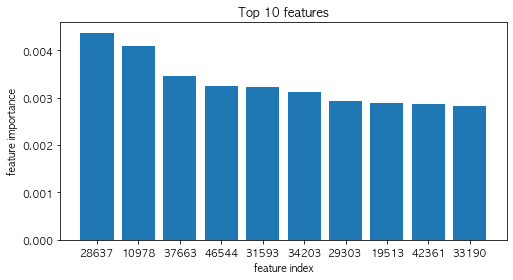

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.72 µs


In [9]:
n_sample = 10000
idx = np.random.choice(range(len(y_train)), n_sample)

model_sel = ExtraTreesClassifier(n_estimators=50).fit(X_train[idx,:], y_train[idx])

fi = model_sel.feature_importances_
fi_idx = np.argsort(fi)

plt.figure(figsize=(8,4))
plt.bar(range(10), fi[fi_idx[-10:]])
plt.xticks(range(10), fi_idx[-10:])
plt.gca().invert_xaxis()
plt.title('Top 10 features')
plt.xlabel('feature index')
plt.ylabel('feature importance')
plt.show()

selector = SelectFromModel(model_sel, prefit=True, max_features=X_train_sel.shape[1])
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)
%time

In [10]:

model_sel = BernoulliNB()
model_sel.fit(X_train_sel, y_train)
print("train accuracy:{:5.3f}".format(accuracy_score(y_train, model_sel.predict(X_train_sel))))
print("test accuracy :{:5.3f}".format(accuracy_score(y_test, model_sel.predict(X_test_sel))))
%time

train accuracy:0.602
test accuracy :0.491
CPU times: user 16 µs, sys: 7 µs, total: 23 µs
Wall time: 44.1 µs
